<a href="https://colab.research.google.com/github/DhaniAAA/Scrapping-Ulasan/blob/main/Teks_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier  # Import KNN
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd

In [3]:
nltk.download('punkt')  # Download data yang diperlukan untuk tokenisasi
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
df = pd.read_csv("/content/sentiment_analysis_results.csv")
df

,Content,Sentiment,Score
0,ko om polos yg haus ga sebagus ini tampilan nya,Negative,-2
1,lu salah pesen bang yg lawson kalo mau kuahnya...,Negative,-4
2,kek mana masa lawson kalah sama haus,Negative,-12
3,lawson gaada obeng pokonya,Neutral,0
4,cheesebokki lawson ini tteoknya kak yang ada k...,Neutral,0
...,...,...,...
3263,enak bgt kk,Positive,4
3264,sebox di jual berapa,Neutral,0
3265,bikin ini,Neutral,0
3266,buat ini yok,Neutral,0


In [5]:
def preprocess_text_lemmatize(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [6]:
df['Content'] = df['Content'].astype(str).apply(preprocess_text_lemmatize)
df

,Content,Sentiment,Score
0,ko om polo yg haus ga sebagus tampilan nya,Negative,-2
1,lu salah pesen bang yg lawson kalo kuahnya yg ...,Negative,-4
2,kek lawson kalah haus,Negative,-12
3,lawson gaada obeng pokonya,Neutral,0
4,cheesebokki lawson tteoknya kak kejunya,Neutral,0
...,...,...,...
3263,enak bgt kk,Positive,4
3264,sebox jual,Neutral,0
3265,bikin,Neutral,0
3266,yok,Neutral,0


In [7]:
#Metode CountVectorizer
X = df['Content']
y = df['Sentiment'].astype(str)  # Convert ratings to strings for classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
X_train_array = X_train_vec.toarray()
X_test_array = X_test_vec.toarray()

# Optional: Convert to DataFrame for better readability
train_df = pd.DataFrame(X_train_array, columns=vectorizer.get_feature_names_out())
test_df = pd.DataFrame(X_test_array, columns=vectorizer.get_feature_names_out())

print("X_train_vec as array:\n", train_df)
print("\nX_test_vec as array:\n", test_df)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Content']
y = df['Validasi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# TF-IDF
# Algoritma Naive Bayes (tetap ada)
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_tfidf, y_train)
y_pred_nb = classifier_nb.predict(X_test_tfidf)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Algoritma K-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k yang berbeda
classifier_knn.fit(X_train_tfidf, y_train)
y_pred_knn = classifier_knn.predict(X_test_tfidf)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Algoritma Decision Tree
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train_tfidf, y_train)
y_pred_dt = classifier_dt.predict(X_test_tfidf)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


In [ ]:
# CountVectorizer
# Algoritma Naive Bayes (tetap ada)
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_vec, y_train)
y_pred_nb = classifier_nb.predict(X_test_vec)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Algoritma K-Nearest Neighbors (KNN)
classifier_knn = KNeighborsClassifier(n_neighbors=5)  # Anda bisa mencoba nilai k yang berbeda
classifier_knn.fit(X_train_vec, y_train)
y_pred_knn = classifier_knn.predict(X_test_vec)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Algoritma Decision Tree
classifier_dt = DecisionTreeClassifier(random_state=42)
classifier_dt.fit(X_train_vec, y_train)
y_pred_dt = classifier_dt.predict(X_test_vec)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))


In [20]:
# Cross-validation
# CountVectorizer
cv_scores = cross_val_score(classifier_nb, X_train_vec, y_train, cv=10)
print(f'Cross-validation scores MNB: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

cv_scores = cross_val_score(classifier_knn, X_train_vec, y_train, cv=5)
print(f'Cross-validation scores KNN: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

cv_scores = cross_val_score(classifier_dt, X_train_vec, y_train, cv=5)
print(f'Cross-validation scores DT: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean():.2f}')

Cross-validation scores MNB: [0.80534351 0.79007634 0.78625954 0.81679389 0.83524904 0.81609195
 0.82375479 0.76628352 0.79693487 0.81992337]
Mean cross-validation score: 0.81
Cross-validation scores KNN: [0.75143403 0.76099426 0.74760994 0.73231358 0.74712644]
Mean cross-validation score: 0.75
Cross-validation scores DT: [0.88527725 0.85086042 0.8623327  0.87954111 0.86590038]
Mean cross-validation score: 0.87


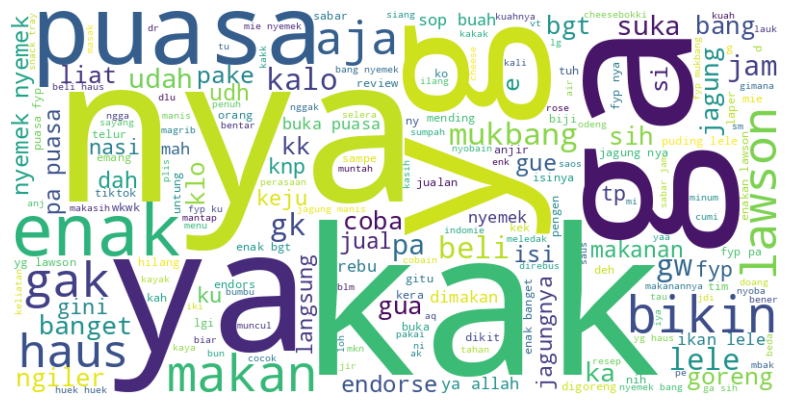

In [22]:
# prompt: buatkan woldcloud kata yang sering muncul

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks dalam kolom 'Content'
text = " ".join(df['Content'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
incorrect_indices = np.where(y_pred_nb != y_test)[0]

In [ ]:
incorrect_indices_knn = np.where(y_pred_knn != y_test)[0]
print("\nIncorrect KNN Predictions:")
for i in incorrect_indices_knn[:2]:
    print("Predicted: >", y_pred_knn[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

incorrect_indices_dt = np.where(y_pred_dt != y_test)[0]
print("\nIncorrect DT Predictions:")
for i in incorrect_indices_dt[:2]:
    print("Predicted: >", y_pred_dt[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])

incorrect_indices_nb = np.where(y_pred_nb != y_test)[0]
print("\nIncorrect NB Predictions:")
for i in incorrect_indices_nb[:2]:
    print("Predicted: >", y_pred_nb[i], "< Actual:",
          y_test.iloc[i], "Text:", X_test.iloc[i])